In [1]:
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# display configurations
# sns.set(font_scale=1.5)

pd.options.display.max_columns=200
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [2]:
df = pd.read_excel('Data/Real_Estate Data.xlsx')
df.head()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

## Basic Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [4]:
# rename a column
df.rename(columns={"Propert Type":"Property Type"}, inplace=True)

#### We can drop 'Sr. No.' & 'Location' columns

In [5]:
df.Location.unique()

array(['Pune, Maharashtra, India'], dtype=object)

#### We can convert 'Propert Type' to numerical

In [6]:
df['Property Type'].unique()

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

#### Convert ['Property Type', 'Price in lakhs', 'Property Area in Sq. Ft.'] to float

In [7]:
# df['Company Name'].unique()
# df['Sub-Area'].unique()
# df['TownShip Name/ Society Name'].unique()

In [8]:
df.isna().sum()

Sr. No.                               0
Location                              0
Sub-Area                              0
Property Type                         0
Property Area in Sq. Ft.              0
Price in lakhs                        0
Price in Millions                     1
Company Name                          0
TownShip Name/ Society Name           0
Total TownShip Area in Acres        149
ClubHouse                             0
School / University in Township       0
Hospital in TownShip                  0
Mall in TownShip                      0
Park / Jogging track                  0
Swimming Pool                         0
Gym                                   0
dtype: int64

#### Impute 'Total TownShip Area in Acres' column using KNNImputer or SimpleImuter

## Data Cleaning

In [9]:
# Dropping unecessary columns ['Sr. No.', 'Location']

df1 = df.drop(['Sr. No.', 'Location'], axis=1)
df1.head()

,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


### Cleaning 'Property' related columns

In [10]:
df1['Property Type'].unique()

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [11]:
# we can drop this row
df1[df1['Property Type'] == 'shop']

,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
51,pimpri pune,shop,163,54,5.4,ravima ventures,the work club,NaN,no,No,No,No,Yes,no,Yes


In [12]:
df1 = df1[df1['Property Type'] != 'shop']

In [13]:
df1['Property Area in Sq. Ft.'].unique()

array([492, 774, 889, 1018, 743, 975, '877 to 912', '1077 to 1272', 905,
       1125, 1644, 2220, '662 to 845', '890 to 1212', 423, 665,
       '792 to 965', 462, 666, 750, 1030, 446, 796, 842, 865, 902, 1154,
       872, 934, 1088, 1109, 1163, 1419, 1485, 684, 990, 882, 1103, 543,
       '801 to 1125', '1272 to 2138', 320, 473, 581, 790, 820, 989, 1003,
       1182, 1579, 491, 659, 732, 809, 460, 734, 753, 675, 917, 670, 740,
       847, 936, 1032, 1698, 2267, 725, 731, 744, 923, 930, 792, 1180,
       860, 988, 1093, 456, 644, 785, 1060, 113, 664, 673, 682, 698, 1239,
       1315, 1388, 1463, 1671, 1687, 575, 751, 761, 871, 1166, 1206, 1272,
       1279, 646, 717, 436, 637, 642, 655, 668, 810, 735, 783, 805, 1074,
       1111, 535, 947, 697, 711, 980, 1400, 1772, 1662, 705, 726, 793,
       904, 1168, 1189, 479, 693, 808, 1086, 844, 873, 606, 611, 626, 691,
       835, 854, 715, '624 to 761', 968, 996, 1038, 489, 598, 616, 692,
       867, 908, 1624, 2043, 727, '561 to 902', '1056 to

#### For these types of values '1070 to 1200' in 'Property Area in Sq. Ft.', we can average out

In [14]:
def extract(e, flag=True) :
    """
    Gives the total number of bedrooms or property area
    params :
        e : string, either the number of rooms or property area
        flag : boolean, True : number of bedrooms, 
                        False : property area
    return :
        float, number of bedrooms / Property Area
    """
    try:
        if flag:
            bhk_num = re.findall('\d\+\d|\d\.\d|\d', e)

            if '+' in bhk_num[0]:
                bhk_num = bhk_num[0].split('+')
                e = float(bhk_num[0]) + float(bhk_num[1])
            else:
                e = float(bhk_num[0])

            return e
        else:
            if type(e) != str:
                return float(e)

            e = e.strip()
            area_list = re.sub('\D+', ' ', e).split()
            e = sum(float(e) for e in area_list)/len(area_list)

            return e
    except:
        return np.nan

##############################
def extract_property(df) :
    """
    Extracts the number of rooms from 'Property Type' columns and values for 
    "Property Area in Sq. Ft."
    Params :
        data : Pandas dataframe, the input data
    Returns :
        Pandas dataframe
    """
    data = df.copy()
    data["Property Type"] = data["Property Type"].apply(extract)
    data["Property Area in Sq. Ft."] = \
       data["Property Area in Sq. Ft."].apply(lambda x: extract(x, False))
    
    return data

In [15]:
df1 = extract_property(df1)

In [16]:
df1.head()

,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,Bavdhan,1.0,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Bavdhan,2.0,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Bavdhan,3.0,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Bavdhan,3.0,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,Mahalunge,2.0,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Converting 'Price in lakhs' to numeric datatype

In [17]:
df1['Price in lakhs'] = df1['Price in lakhs'].replace('Null', np.nan)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sub-Area                          199 non-null    object 
 1   Property Type                     199 non-null    float64
 2   Property Area in Sq. Ft.          199 non-null    float64
 3   Price in lakhs                    198 non-null    float64
 4   Price in Millions                 198 non-null    float64
 5   Company Name                      199 non-null    object 
 6   TownShip Name/ Society Name       199 non-null    object 
 7   Total TownShip Area in Acres      51 non-null     float64
 8   ClubHouse                         199 non-null    object 
 9   School / University in Township   199 non-null    object 
 10  Hospital in TownShip              199 non-null    object 
 11  Mall in TownShip                  199 non-null    object 
 12  Park / J

## Looking for Outlier

In [19]:
df2 = df1.copy()

In [20]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Property Type,199.0,2.394472,0.844722,1.000,2.000,2.000,3.00000,6.0
Property Area in Sq. Ft.,199.0,897.733668,377.641016,113.000,670.000,805.000,1044.50000,2447.0
Price in lakhs,198.0,95.466667,102.085542,13.190,51.250,71.250,99.71750,930.0
Price in Millions,198.0,9.546667,10.208554,1.319,5.125,7.125,9.97175,93.0
Total TownShip Area in Acres,51.0,97.392157,266.710786,2.500,5.000,25.000,25.00000,1000.0


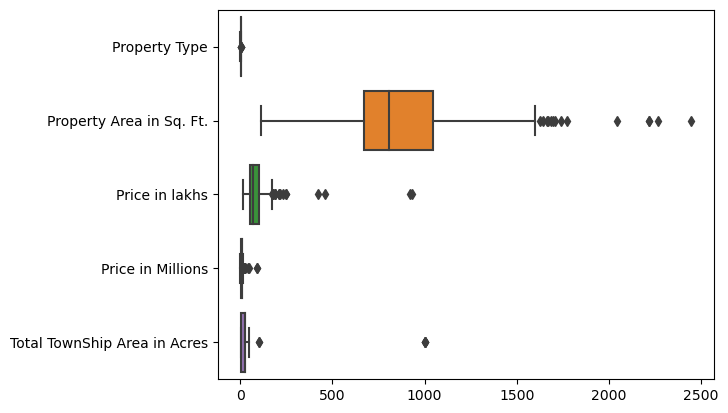

In [21]:
sns.boxplot(data=df2, orient='h');

In [22]:
def computeUpperFence( df_col, up=True ):
    """
    Computes the upper/lower fence for a given column.
    Params:
        df_col: Pandas series, dataframe column
        up: boolean, True for upper fence, False for lower fence
    Return:
        upper/lower fence value : float
    """
    iqr = df_col.quantile(.75) - df_col.quantile(.25) # inter quartile range
    if up:
        return df_col.quantile(.75) + iqr*1.5
    return df_col.quantile(.25) - iqr*1.5  

#### Analyzing ['Property Area in Sq. Ft.', 'Price in Millions','Total TownShip Area in Acres']

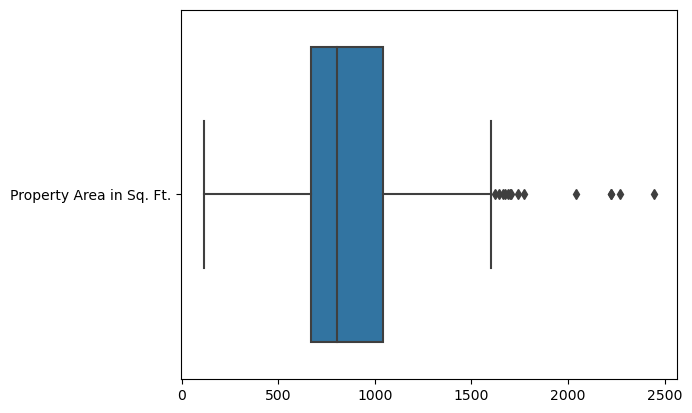

In [23]:
sns.boxplot( data=df2[["Property Area in Sq. Ft."]], orient="h" )
plt.show();

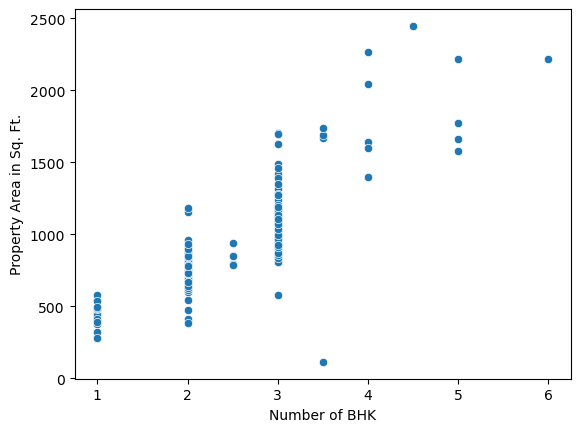

In [24]:
sns.scatterplot(x='Property Type', 
                y='Property Area in Sq. Ft.',
                data=df2)
plt.xlabel("Number of BHK")
plt.ylabel("Property Area in Sq. Ft.")
plt.show();

#### Above we can see for 3.5 BHK flat, the property is abnormal. So, we can remove this value

In [25]:
df2[df2['Property Type']==3.5]

,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
86,koregoan,3.5,113.0,143.0,14.3,shroff developers,aureta,NaN,no,no,no,no,yes,yes,yes
96,NIBM,3.5,1671.0,211.0,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,NIBM,3.5,1687.0,213.0,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
183,baner,3.5,1740.0,250.0,25.0,Kalpataru,jade residences,NaN,no,no,no,no,yes,yes,no


In [26]:
# Checking the outliers for Property Area in Sq. Ft.

# x_pa = df2['Property Area in Sq. Ft.']
# pa_up_lim = computeUpperFence(x_pa)
# df2[x_pa>pa_up_lim] 

In [27]:
# Removing index 86

df2.drop(index=[86], inplace=True)

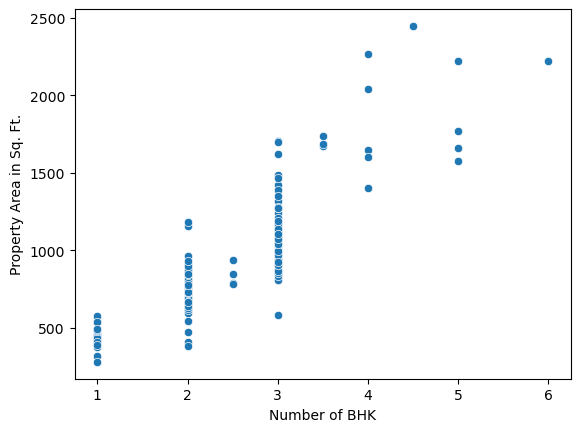

In [28]:
sns.scatterplot(x='Property Type', 
                y='Property Area in Sq. Ft.',
                data=df2)
plt.xlabel("Number of BHK")
plt.ylabel("Property Area in Sq. Ft.")
plt.show();

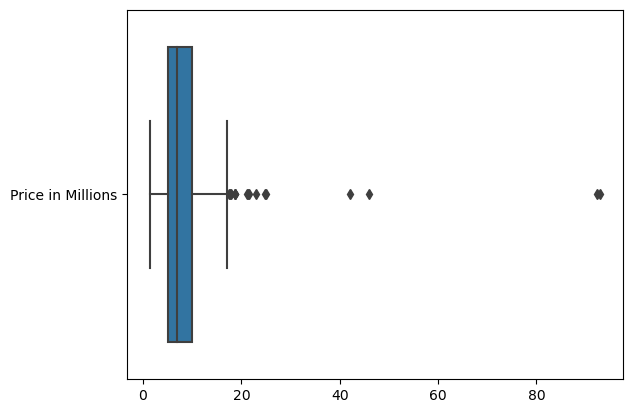

In [29]:
sns.boxplot( data=df2[["Price in Millions"]], orient="h" )
plt.show();

In [30]:
# Checking the outliers for Price in Millions

x_pim = df2['Price in Millions']
pim_up_lim = computeUpperFence(x_pim)
# df2[ x_pim>pim_up_lim]


# They are essentially large apartments except 2 at index 73, 74.

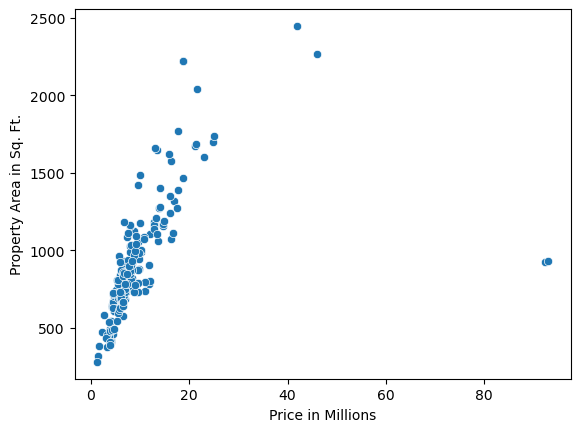

In [31]:
sns.scatterplot(x='Price in Millions',
                y='Property Area in Sq. Ft.',
                data=df2);

In [32]:
# Dropping index 73, 74 as they have abnormally high prices
# for the Property Area

df2 = df2[df2['Price in Millions'] < 80]

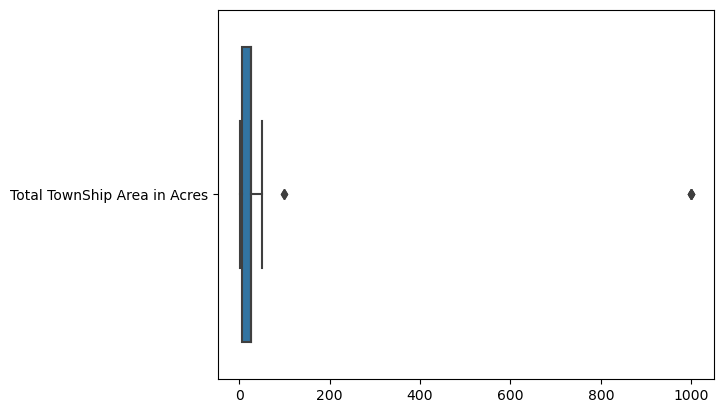

In [33]:
sns.boxplot( data=df2[["Total TownShip Area in Acres"]], orient="h" )
plt.show();

In [34]:
# Checking the outliers for Total TownShip Area in Acres
x_tta = df2['Total TownShip Area in Acres']
tta_up_lim = computeUpperFence(x_tta)
df2[ x_tta>tta_up_lim]


# Large cities are not outliers.

,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,Bavdhan,1.0,492.0,39.0,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Bavdhan,2.0,774.0,65.0,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Bavdhan,3.0,889.0,74.0,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Bavdhan,3.0,1018.0,89.0,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,Mahalunge,2.0,743.0,74.0,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,Mahalunge,3.0,975.0,95.0,9.5,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


### Price Selection

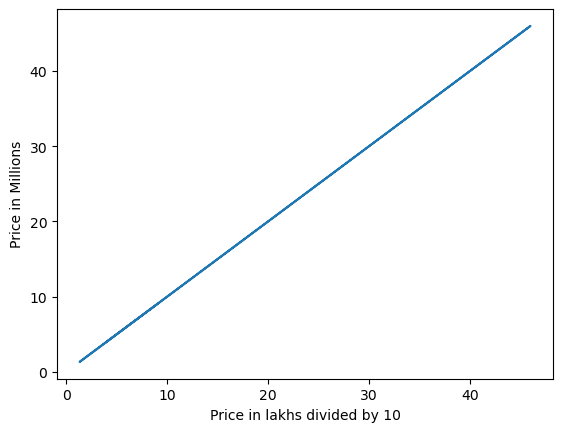

In [35]:
# Comparing Price in Millions with Price in lakhs

plt.plot( df2["Price in lakhs"]/10., df2["Price in Millions"] )
plt.xlabel("Price in lakhs divided by 10")
plt.ylabel("Price in Millions")
plt.show();

# They are same so we can drop one

In [36]:
df2 = df2.drop(columns=["Price in lakhs"], axis=1)

### NaN Values

In [37]:
df2.isna().sum()

Sub-Area                              0
Property Type                         0
Property Area in Sq. Ft.              0
Price in Millions                     0
Company Name                          0
TownShip Name/ Society Name           0
Total TownShip Area in Acres        144
ClubHouse                             0
School / University in Township       0
Hospital in TownShip                  0
Mall in TownShip                      0
Park / Jogging track                  0
Swimming Pool                         0
Gym                                   0
dtype: int64

In [38]:
def compute_fill_rate( df ) :
    """
    Computing the rate of non-NaNs for each column
    Params :
        df : Pandas dataframe, input data
    Return :
        Pandas dataframe
    """
    fr = pd.DataFrame(1-df.isnull().sum().values.reshape(1,-1)/df.shape[0], 
                         columns=df.columns)
    return fr

###########################################
def plot_fill_rate( df ) : 
    """
    Plot the fill rate
    df : Pandas dataframe, input data
    """
    fill_rate = compute_fill_rate( df )
    fig, ax = plt.subplots( figsize=(18,18) )
    sns.barplot(data=fill_rate, orient="h")
    ax.set_title( "Fill rate for columns", fontsize=28 )
    ax.set(xlim=(0, 1.))
    
    
###########################################
def drop_empty_axis( df, minFillRate, axis=1 ) :
    """
    Drops axes that do not meet the minimum non-Nan rate
    Params :
        df : Pandas dataframe
        minFillRate : float, minimum filled fraction [0,1]
        axis : int, 1 for column, 0 for row
    Returns :
        Pandas dataframe 
    """
    i = 0 if axis==1 else 1 
    return df.dropna( axis=axis, thresh=int(df.shape[i]*minFillRate) )


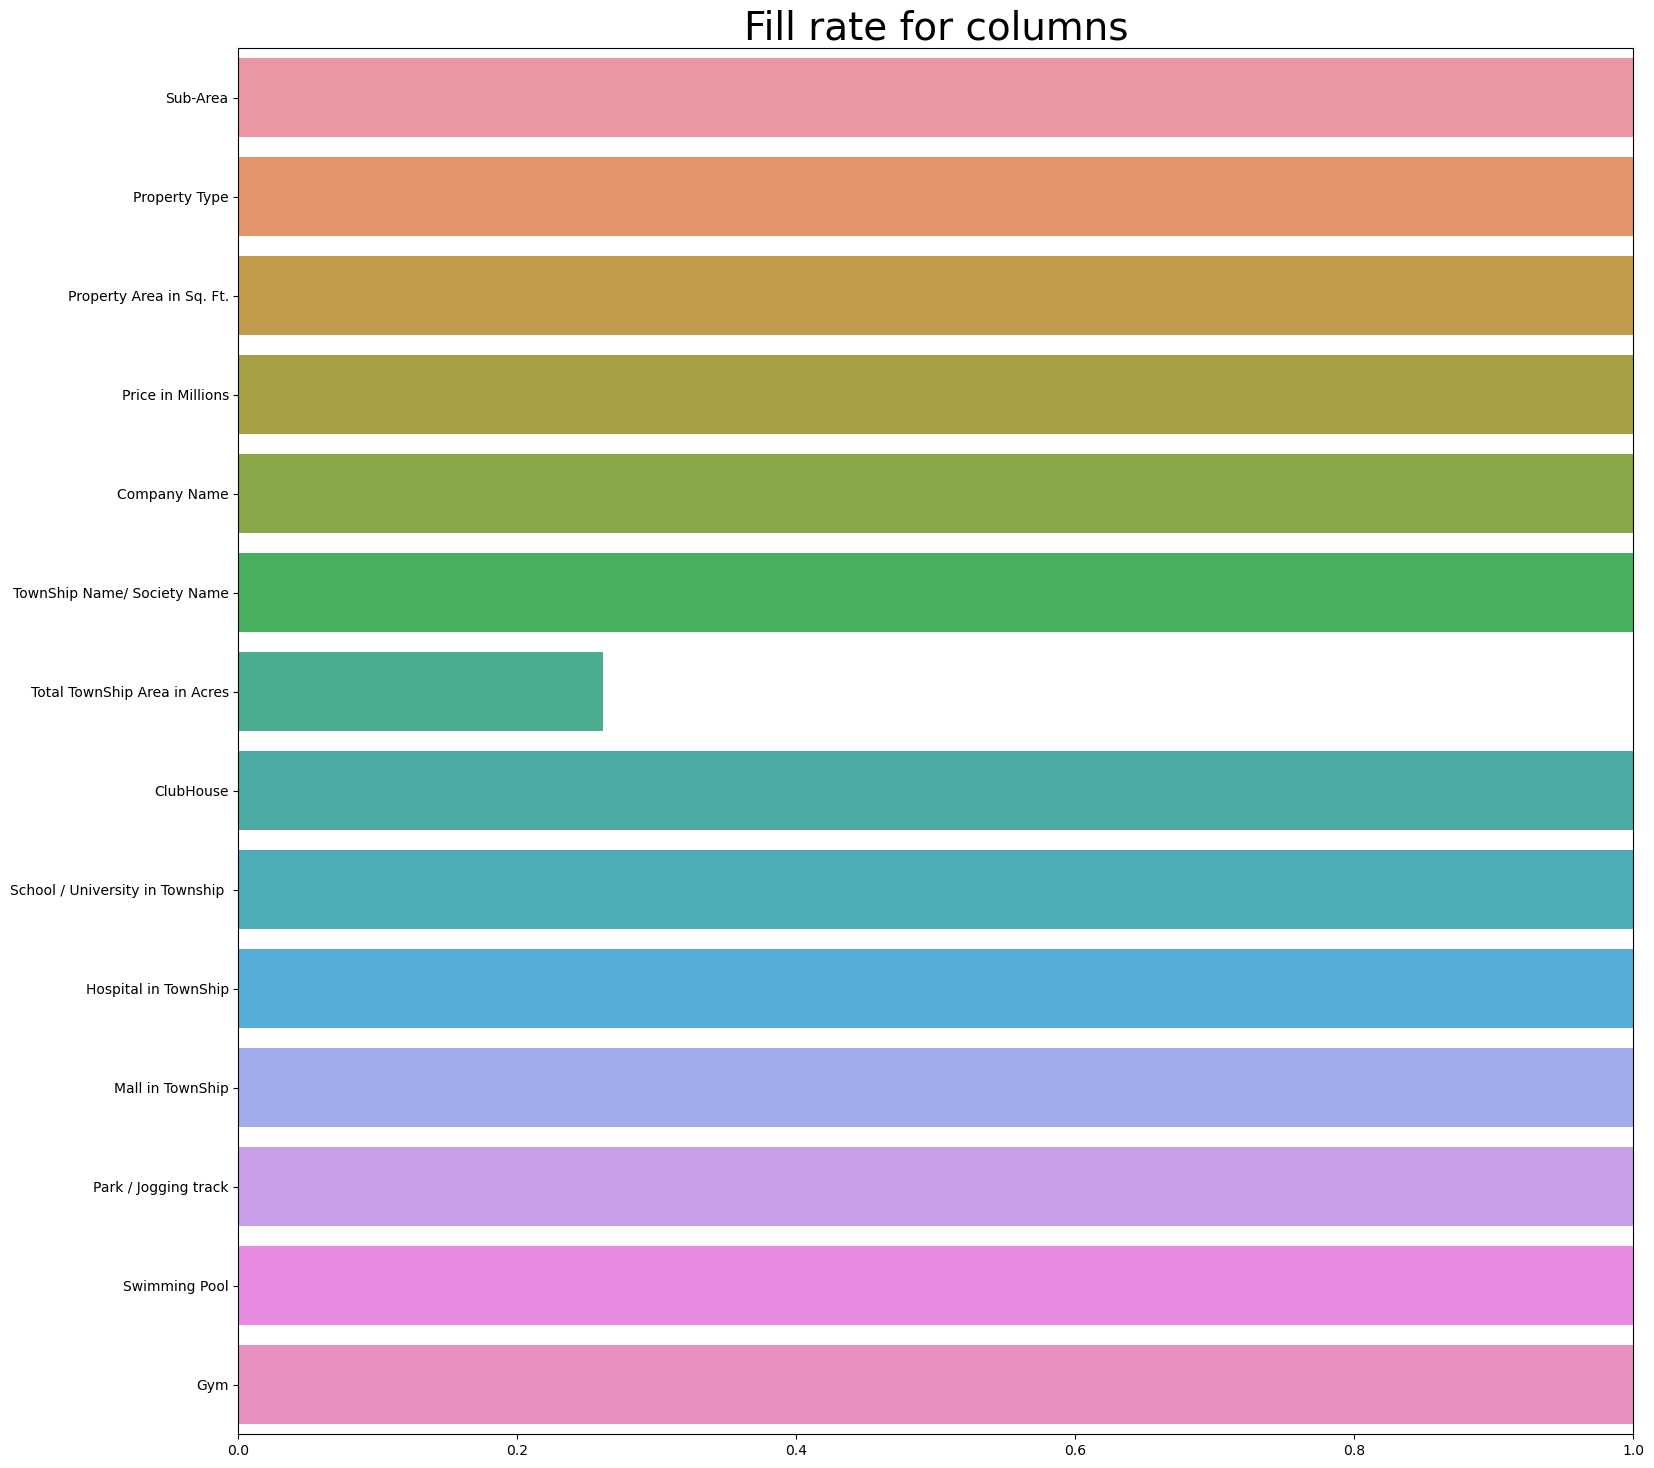

In [39]:
plot_fill_rate(df2)

In [40]:
compute_fill_rate(df2)

# In 'Total TownShip Area in Acres' only 26% of values are filled 

,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1.0,1.0,1.0,1.0,1.0,1.0,0.261538,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
# Total TownShip Area in Acres
df2[["Sub-Area", "TownShip Name/ Society Name",\
     "Total TownShip Area in Acres" ]]\
    .sort_values("Sub-Area").reset_index(drop=True)

,Sub-Area,TownShip Name/ Society Name,Total TownShip Area in Acres
0,Akurdi,Mantra Sky Tower,3.5
1,Akurdi,Mantra Sky Tower,3.5
2,Akurdi,Mantra Sky Tower,3.5
3,Akurdi,Mantra Sky Tower,3.5
4,Akurdi,Mantra Sky Tower,3.5
5,Akurdi,Mantra Sky Tower,3.5
6,BANER,TEJ ELEVIA,2.5
7,BANER,vtp solitaire,NaN
8,BANER,SUPREME ESTIA,5.0
9,BANER,SUPREME ESTIA,5.0


We have more than 50% of the data missing 'Total TownShip Area in Acres', so it's not wise to impute the data.

In [47]:
# Drop columns filled by less than 50%

df2 = drop_empty_axis(df2, minFillRate=.5)

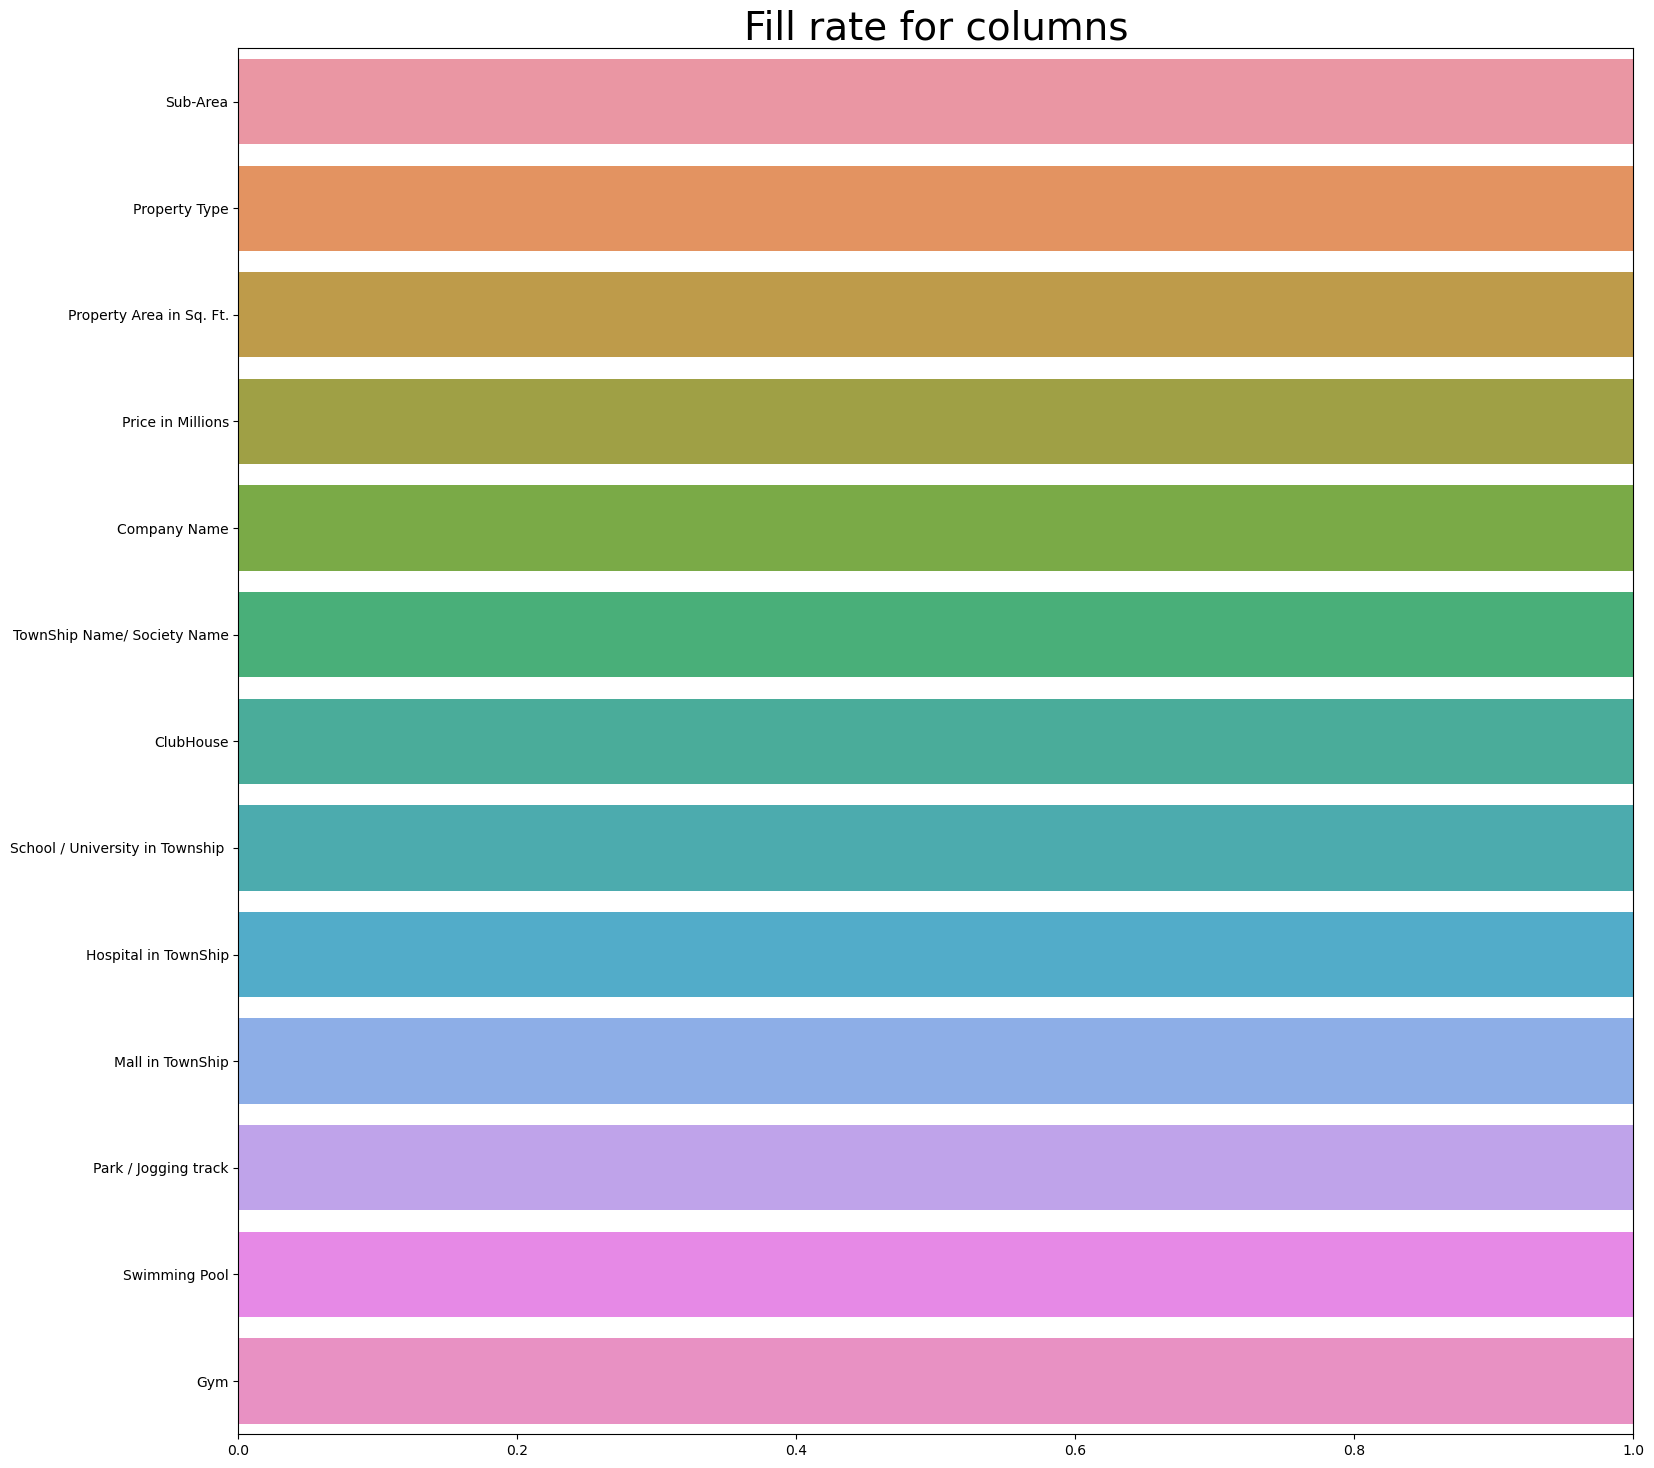

In [48]:
plot_fill_rate(df2)

### Now, we have processed all the numerical columns

## Regularising the categorical columns

In [49]:
df3 = df2.copy()

In [50]:
df3.select_dtypes(include='object').head(3)

,Sub-Area,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes


### Binary categorical columns

In [51]:
binary_cols = df2.iloc[:,-7:].columns.to_list()
binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [53]:
def print_uniques( cols, df):
    for col in cols:
        list_unique = df[col].unique()
        list_unique.sort()
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("--------------------")
        
        
print_uniques(binary_cols, df3)

ClubHouse :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
--------------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
--------------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
--------------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------


In [55]:
# Correcting the binary values

for col in binary_cols:
    df3[col] = df3[col].apply(lambda x: x.strip().lower())
    
print_uniques(binary_cols, df3)

ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
--------------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
--------------------


### Multi-categorical columns

In [57]:
obj_cols = df3.select_dtypes(include='object').columns.to_list()

multiCat_cols = list(set(obj_cols)^set(binary_cols))
multiCat_cols

['TownShip Name/ Society Name', 'Sub-Area', 'Company Name']

In [58]:
for col in multiCat_cols:
    df3[col] = df3[col].apply(lambda x: x.strip().lower()) 

In [59]:
print_uniques(multiCat_cols, df3)

TownShip Name/ Society Name :
 ['7hills' 'abitante fiore' 'anp universe' 'anutham' 'atulya kanhe'
 'aureta' 'bhaktamar residency' 'bliss solitaire' 'bluegrass residences'
 'brookefield willows' 'dolphin garima' 'eternia 2.0'
 'godrej hills retreat' 'impero' 'infinity' 'jade residences' 'k ville'
 'kalpataru serenity' 'khush vista' 'kiarah terrazo' 'lesiure town'
 'mahalunge riviera' 'mantra 29 gold' 'mantra insignia' 'mantra monarch'
 'mantra sky tower' 'neco beaumont' 'newton homes' 'om mangalam chaitanya'
 'oxy beaumonde' 'oxy eterno' 'parklane urbanjoy' 'presidenta' 'presidia'
 'puraniks sayama' 'rhythm county' 'river dale residency'
 'satyam serenity' 'satyam shery' 'satyam shivam' 'sensorium' 'simplicity'
 'sportsville' 'sukwani aspire' 'supreme estia' 'tej elevia'
 'tranquility annexe' 'unique legacy royale' 'urban skyline' 'vanaha'
 'vtp blue water' 'vtp cierra' 'vtp solitaire']
Number of unique categories: 53
--------------------
Sub-Area :
 ['akurdi' 'balewadi' 'baner' 'bavdha

In [60]:
df3.head()

,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


## Saving the cleaned data

In [62]:
# renaming the coloumn names
df3.columns=["sub_area", "n_bhk", "property_area_SqFt", "price", 
             "company_name", "township",
             "club_house", "school", "hospital", 
             "mall", "park", "pool", "gym"]

In [63]:
df3.head(3)

,sub_area,n_bhk,property_area_SqFt,price,company_name,township,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes


In [66]:
df3.to_csv("Data/cleaned_real_estate_data.csv", index=False)